In [1]:
from pl_packages import *
from tail_functions import *
from plotting_functions import *

Let $W$ be a continuous RV with density $f(w)\,.$

$$ \mathbb{P}(W>w) = 
\begin{cases}
e^{-\beta \frac{w}{w_m}}\,, & 0<w<w_m \\
e^{-\beta} \left(\dfrac{w}{w_m} \right)^{-\beta}\,, & w \geq w_m
\end{cases}
$$

with $\beta>0\,.$  $W$ is then defined as an exponential distribution up to $w_m$ and a power law after $w_m\,$.

Note
$$\mathbb{P}(W>w) =  \int_{w}^{\infty}f(x) dx = 1-\int_{0}^{w}f(x) dx$$

So by the fundamental theorem of calculus we have

$$ \frac{d}{dw}\mathbb{P}(W>w)=-f(w)$$

Thus the density is

$$ f(w) = 
\begin{cases}
\frac{\beta}{w_m} e^{-\beta \frac{w}{w_m}}, & 0<w<w_m \\
e^{-\beta} \beta w_m^{\beta}w^{-(\beta+1)}, & w \geq w_m
\end{cases}
$$

To generate $W$ we take the inverse of $\mathbb{P}(W>w)=p \in [0,1]\,.$ This leads to a value $w$ from $W$ generated as follows

$$
w= \begin{cases}
\frac{w_m}{\beta} \log \left(\frac{1}{p}\right)\,, &  1 > p > e^{-\beta} \\
w_m e^{-1}p^{-\frac{1}{\beta}}\,, & p \leq  e^{-\beta}
\end{cases}
$$


In [2]:
#directory to save plots
direc_save ='/home/samuel/Documents/other/other_p/research/power_laws/pl_code/plots/' 

In [27]:
#Get sample of size n from RV W with parameters w_m and beta=b
def get_sample(w_m,b,n):
    p_n=uniform.rvs(size=n)
    s=[]
    for i in range(n):
        p=p_n[i]
        if p <= np.exp(-b):
            w=w_m*np.exp(-1)*p**(-1/b)
        else:
            w=w_m/b*np.log(1/p)
        s.append(w)
    s=np.asarray(s,float)
    return s
    
#Font sizes and labels for plots
font_sizes=[15,15,15,15,15]
label_arr0=[r'$w$','',font_sizes,0] #no legend
label_arr1=[r'$w$','',font_sizes,1] #legend

To predict $w_m$ and $\beta$ we use the methods from 

Clauset, Aaron, Cosma Rohilla Shalizi, and Mark EJ Newman. "Power-law distributions in empirical data." SIAM review 51.4 (2009): 661-703.

https://arxiv.org/pdf/0706.1062.pdf;

In [28]:
%%time
w_m=20
b=1
n=1000

w_s=get_sample(w_m,b,n)

len_sample_gw_m=len(np.where(w_s>=w_m)[0])

print('Length of sample greater that', w_m, 'is', len_sample_gw_m)
print('')

w_min_pred_vec=x_min_pred(w_s)

w_min_pred=w_min_pred_vec[1]

print('True w_m =', w_m)
print('Predicted w_m =', w_min_pred)

get_power_law_fit_vec=get_power_law_fit(w_s,w_min_pred)

print('')
print('True b =', b)
print('Predicted b =', get_power_law_fit_vec[3])
print('')

Length of sample greater that 20 is 362

True w_m = 20
Predicted w_m = 80.01023304064188

True b = 1
Predicted b = 1.3565556542500057

CPU times: user 476 ms, sys: 0 ns, total: 476 ms
Wall time: 473 ms


In [29]:
%%time
#Finding w_m faster if using pre-defined interval
w_l=w_m-5
w_u=w_m+5
w_min_pred_interval_vec=x_min_pred_interval(w_s,w_l,w_u)
w_min_pred_interval=w_min_pred_interval_vec[1]
print('True w_m =', w_m)
print('Predicted w_m =', w_min_pred_interval)

True w_m = 20
Predicted w_m = 24.8947540686381
CPU times: user 80 ms, sys: 0 ns, total: 80 ms
Wall time: 74.1 ms


Faster implementation with power law package:

https://github.com/jeffalstott/powerlaw

In [30]:
%%time

results=powerlaw.Fit(w_s)

#agrees with above
print('Predicted w_m =',results.power_law.xmin)
print('Predicted b =',results.power_law.alpha-1)

Calculating best minimal value for power law fit


Predicted w_m = 80.01023304064188
Predicted b = 1.356555654250006
CPU times: user 212 ms, sys: 0 ns, total: 212 ms
Wall time: 211 ms


In [31]:
x,y=tail(w_s)

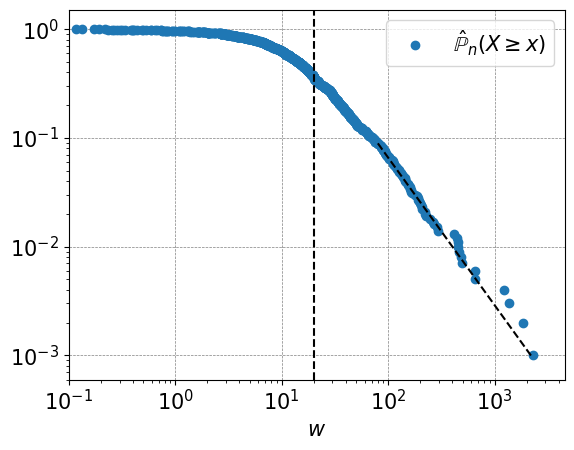

In [36]:
plt.loglog(x,y,'o',label='$\hat{\mathbb{P}}_n(X \geq x)$')
plt.loglog(get_power_law_fit_vec[0],get_power_law_fit_vec[1],color='black',linestyle='--')
add_labels(plt,*label_arr1)
if x[0]<0.1:
    plt.xlim(0.1,2*x[-1])
plt.ylim(0.6*y[-1],1.5*y[0])
plt.axvline(w_m,color='black',linestyle='--')

# plt.savefig(direc_save+'pl_fit',bbox_inches = 'tight')

## Lomax Distribution

Defined by
$ \mathbb{P}(X>x)$ 

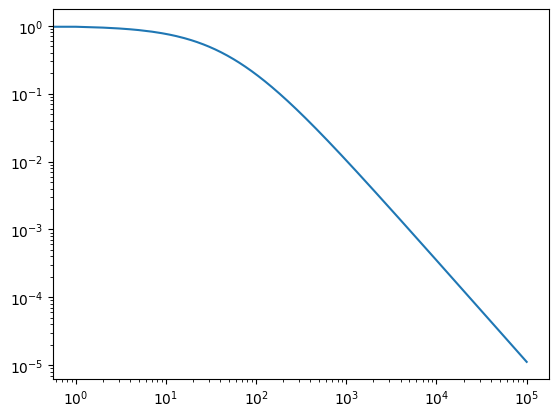

In [43]:
x=np.arange(0,10**5,1)
def T(x,l,b):
    return (1+x/l)**(-b)
l=50
b=1.5
y=T(x,l,b)

plt.loglog(x,y)

## Goodness of fit

In [16]:
# b=2
# x_m=10
# n=1000

# pareto_sample=pareto.rvs(b, scale=x_m, size=n)

In [17]:
# x,y=tail(pareto_sample)

In [18]:
# pareto_fit_vec=get_power_law_fit(pareto_sample,x_m)

# print(pareto_fit_vec[3])

In [19]:
# plt.loglog(x,y,'o')
# plt.loglog(pareto_fit_vec[0],pareto_fit_vec[1],color='black',linestyle='--')
# add_labels(plt,*label_arr0)

In [20]:
# K=KS_stat(y,pareto_fit_vec[1])
# print(K)

In [21]:
# N=100
# p=get_p_val(x_m,b,K,N,n)

# print('p-value is ', p)

In [ ]:
#check with lognormal